<a href="https://colab.research.google.com/github/SandySingh72/DATA_Analytics/blob/main/Linear_Regression_with_Data_Sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
hr = pd.read_csv("HR_comma_sep.csv")
hr.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


One Hot Encoding

In [ ]:
dum_hr = pd.get_dummies(hr)
dum_hr.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department_IT,bool
Department_RandD,bool


In [ ]:
train, test = train_test_split( dum_hr, test_size=0.3, random_state=25, stratify=dum_hr['left'] )

In [ ]:
train.shape, test.shape

((10496, 21), (4499, 21))

In [ ]:
X_train = train.drop('left', axis=1)
y_train = train['left']
X_test = test.drop('left', axis=1)
y_test = test['left']

In [ ]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((10496, 20), (10496,), (4499, 20), (4499,))

### Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train) # building the model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test) # apply the model on test data
confusion_matrix(y_test, y_pred)

array([[3205,  224],
       [ 677,  393]])

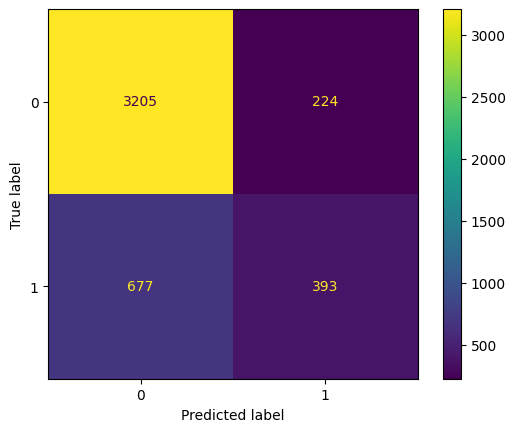

In [ ]:
disp = ConfusionMatrixDisplay( confusion_matrix(y_test, y_pred) )
disp.plot()
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.7997332740609024

### Decision Tree Classifier

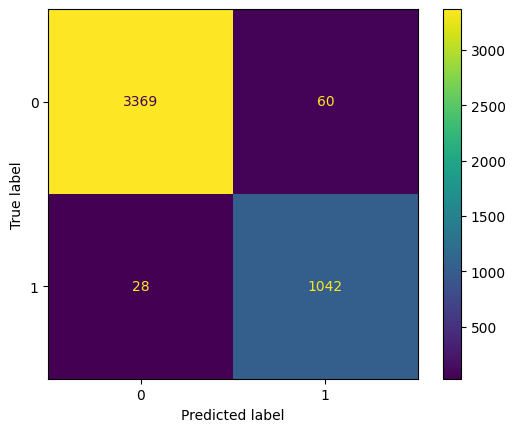

In [ ]:
dtc = DecisionTreeClassifier(random_state=25)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
disp = ConfusionMatrixDisplay( confusion_matrix(y_test, y_pred) )
disp.plot()
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.980440097799511

### Random Forest Classifier

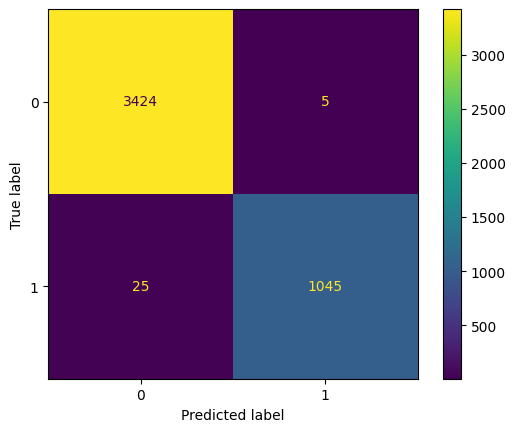

In [ ]:
rf = RandomForestClassifier(random_state=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
disp = ConfusionMatrixDisplay( confusion_matrix(y_test, y_pred) )
disp.plot()
plt.show()

In [ ]:
accuracy_score(y_test, y_pred)

0.9933318515225605